In [32]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


Image resized successfully.
1/1 [==============================] - 0s 97ms/step
Reordered Class Labels:
Index 0: Acanthaulax venusta
Index 1: Cribroperidinium "prominoseptatum"
Index 2: Dingodinium tuberculosum
Index 3: Dingodinium tuberosum
Index 4: Fibrocysta axialis
Index 5: Gonyaulacysta jurassica
Index 6: Palaeoperidinium pyrophorum
Index 7: Senoniasphaera inornata
Index 8: Sentusidinium pilosum
Index 9: Spongodinium delitiense
Index 10: Spongodinium delitiense (operculum)
Index 11: Systematophora areolata
Index 12: Tubotuberella apatela
1/1 [==============================] - 0s 43ms/step
Predicted Class Index: 10
Predicted label: Spongodinium delitiense (operculum)


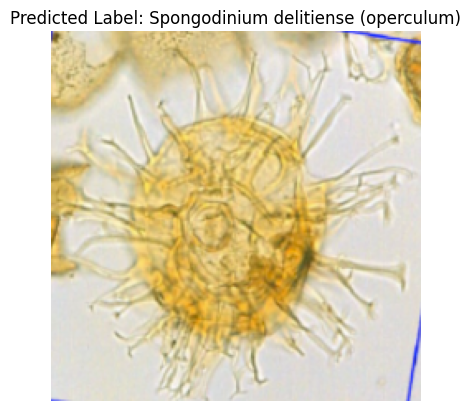

In [7]:
def resize_image(image_path, desired_size):
    try:
        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"Image file '{image_path}' not found.")
            return None
        
        # Load the image using OpenCV
        image = cv2.imread(image_path)
        
        # Check if the image is loaded successfully
        if image is None:
            print(f"Failed to load image '{image_path}'.")
            return None
        
        # Resize the image
        resized_image = cv2.resize(image, desired_size)
        
        # Convert the resized image to RGB format
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
        
        return resized_image
    
    except Exception as e:
        print(f"Error occurred while resizing image '{image_path}': {e}")
        return None

# Specify the path to the image file and the desired size
image_path = '/home/reynel1995/Thesis/Systematophoraareolata.png'
desired_size = (224, 224)  # Example size


# Resize the image
resized_image = resize_image(image_path, desired_size)

# Check if the image was resized successfully
if resized_image is not None:
    # Perform further processing with the resized image
    print("Image resized successfully.")

###########################################################################################
# Load the pre-trained model
model_path = '/home/reynel1995/Thesis/host_1/model.h5'
model = load_model(model_path)

# Get the model's class indices
model_class_indices = model.predict(np.zeros((1, 224, 224, 3))).argmax(axis=1)


# Define the class labels
class_labels = [
    'Acanthaulax venusta',
    'Cribroperidinium "prominoseptatum"',
    'Dingodinium tuberculosum',
    'Dingodinium tuberosum',
    'Fibrocysta axialis',
    'Gonyaulacysta jurassica',
    'Palaeoperidinium pyrophorum',
    'Senoniasphaera inornata',
    'Sentusidinium pilosum',
    'Spongodinium delitiense',
    'Spongodinium delitiense (operculum)',
    'Systematophora areolata',
    'Tubotuberella apatela'
]

# Create a dictionary mapping the model's class indices to the class labels
class_mapping = {index: label for index, label in enumerate(class_labels)}

print("Reordered Class Labels:")
for index, label in class_mapping.items():
    print(f"Index {index}: {label}")


# Preprocess the image
preprocessed_image = np.expand_dims(resized_image, axis=0)
preprocessed_image = preprocessed_image / 255.0  # Normalize pixel values to the range [0, 1]

# Perform the prediction
predictions = model.predict(preprocessed_image)

# Get the predicted class label
predicted_class_index = np.argmax(predictions[0])

# Print the predicted class index
print("Predicted Class Index:", predicted_class_index)

predicted_class_label = class_labels[predicted_class_index]
print(f'Predicted label: {predicted_class_label}')


# Reshape the image array to remove the batch dimension
image_array = np.squeeze(preprocessed_image, axis=0)

# Display the image with the predicted class label
plt.imshow(image_array)
plt.title(f'Predicted Label: {predicted_class_label}')
plt.axis('off')
plt.show()

In [1]:
import docker

In [2]:
client = docker.from_env()

In [3]:
container_id = 'user_2'

In [6]:
container = client.containers.get(container_id)
print(container)

<Container: c552592d1b14>


In [7]:
command = f"python /app/classify_image.py"

In [33]:
response = container.exec_run(command)

In [34]:
output = response.output.decode()
        

In [35]:
output

'2023-07-07 12:02:19.082753: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.\n2023-07-07 12:02:19.084830: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.\n2023-07-07 12:02:19.131894: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.\n2023-07-07 12:02:19.133103: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.\nTo enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.\n2023-07-07 12:02:19.996860: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warni

In [38]:
# Eliminar los caracteres de nueva línea y retorno de carro al final de la cadena
output = output.strip()

In [39]:
# Eliminar los caracteres adicionales antes y después del diccionario JSON
json_str = output[output.find('{'):output.rfind('}') + 1]

In [42]:
json_str

'{"predicted_class_label": "Palaeoperidinium pyrophorum"}'

In [40]:
import json

In [43]:

data = json.loads(json_str)

In [44]:
# Imprimir solo la clave 'predicted_class_label'
predicted_class_label = data['predicted_class_label']
print(predicted_class_label)

Palaeoperidinium pyrophorum


In [47]:
from weasyprint import HTML


In [52]:

# Lee el archivo .py como texto
with open('/home/reynel1995/airflow/dags/thesis_container.py', 'r') as file:
    codigo_py = file.read()

# Crea un objeto HTML con el código fuente de Python
html = HTML(string=codigo_py)

# Especifica la ruta de destino del archivo PDF
ruta_destino = '/mnt/c/Users/reyne/Desktop/Thesis/Imagenes/appendix/dag.pdf'

# Genera el archivo PDF en la ruta de destino especificada
html.write_pdf(ruta_destino)


In [51]:
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter
import pdfkit


def convert_py_to_pdf(input_file, output_file):
    with open(input_file, 'r') as file:
        code = file.read()

    lexer = PythonLexer()
    formatter = HtmlFormatter(style='friendly', full=True)

    html_code = highlight(code, lexer, formatter)
    
    # Save the highlighted code to an HTML file
    with open('code.html', 'w') as file:
        file.write(html_code)
    
    # Convert the HTML file to PDF using pdfkit
    pdfkit.from_file('code.html', output_file)
    
    print(f"Archivo PDF generado: {output_file}")








In [53]:

convert_py_to_pdf(input_file = "/home/reynel1995/airflow/dags/thesis_container.py", output_file= "/mnt/c/Users/reyne/Desktop/Thesis/Imagenes/appendix/dag.pdf")

OSError: No wkhtmltopdf executable found: "b''"
If this file exists please check that this process can read it or you can pass path to it manually in method call, check README. Otherwise please install wkhtmltopdf - https://github.com/JazzCore/python-pdfkit/wiki/Installing-wkhtmltopdf